In [125]:
from pyscbwrapper import SCB

In [126]:
scb = SCB('en')

In [127]:
scb.info()

[{'id': 'AM', 'type': 'l', 'text': 'Labour market'},
 {'id': 'BE', 'type': 'l', 'text': 'Population'},
 {'id': 'BO', 'type': 'l', 'text': 'Housing, construction and building'},
 {'id': 'EN', 'type': 'l', 'text': 'Energy'},
 {'id': 'FM', 'type': 'l', 'text': 'Financial markets'},
 {'id': 'HA', 'type': 'l', 'text': 'Trade in goods and services'},
 {'id': 'HE', 'type': 'l', 'text': 'Household finances'},
 {'id': 'JO', 'type': 'l', 'text': 'Agriculture, forestry and fishery'},
 {'id': 'LE', 'type': 'l', 'text': 'Living conditions'},
 {'id': 'ME', 'type': 'l', 'text': 'Democracy'},
 {'id': 'MI', 'type': 'l', 'text': 'Environment'},
 {'id': 'NR', 'type': 'l', 'text': 'National accounts'},
 {'id': 'NV', 'type': 'l', 'text': 'Business activities'},
 {'id': 'OE', 'type': 'l', 'text': 'Public finances'},
 {'id': 'PR', 'type': 'l', 'text': 'Prices and Consumption'},
 {'id': 'TK', 'type': 'l', 'text': 'Transport and communications'},
 {'id': 'UF', 'type': 'l', 'text': 'Education and research'}]

In [128]:
scb.go_down('BO')

In [129]:
scb.go_down('BO0501')

In [130]:
scb.info()

[{'id': 'BO0501A', 'type': 'l', 'text': 'Real estate price index'},
 {'id': 'BO0501B', 'type': 'l', 'text': 'Prices of real estate'},
 {'id': 'BO0501C', 'type': 'l', 'text': 'Tenant-owned flats'},
 {'id': 'BO0501D', 'type': 'l', 'text': 'Registrations of title'},
 {'id': 'BO0501E', 'type': 'l', 'text': 'Changes of assessed value'},
 {'id': 'BO0501S', 'type': 'l', 'text': 'Economic indicators'}]

In [131]:
scb.go_down('BO0501B')

In [132]:
scb.info()

[{'id': 'FastprisManadAr',
  'type': 't',
  'text': 'Sold real estate by month of acquisition and type of real estate. Year 1992 - 2019',
  'updated': '2020-06-03T09:30:00'},
 {'id': 'FastprisFHRegKv',
  'type': 't',
  'text': 'Sold buildings for seasonal and secondary use by region. Quarter 1998K1 - 2020K2',
  'updated': '2020-08-28T09:30:00'},
 {'id': 'FastprisFHRegAr',
  'type': 't',
  'text': 'Sold buildings for seasonal and secondary use by region. Year 2000 - 2019',
  'updated': '2020-06-03T09:30:00'},
 {'id': 'FastprisHHRegionAr',
  'type': 't',
  'text': 'Sold multi-dwelling and commercial buildings by region and type of real estate. Year 1989 - 2019',
  'updated': '2020-06-03T09:30:00'},
 {'id': 'FastprisHHKv',
  'type': 't',
  'text': 'Sold multi-dwelling and commercial buildings. Quarter 1994K1 - 2020K2',
  'updated': '2020-08-28T09:30:00'},
 {'id': 'FastprisIFKv',
  'type': 't',
  'text': 'Sold manufacturers industries. Quarter 1994K1 - 2020K2',
  'updated': '2020-08-28T09:

In [133]:
scb.go_down('FastprisManadAr')

In [134]:
sold_real_state = scb.get_data()

In [135]:
sold_real_state['columns']

[{'code': 'Fastighetstyp', 'text': 'type of real estate', 'type': 'd'},
 {'code': 'Tid', 'text': 'year', 'type': 't'},
 {'code': 'BO0501I6', 'text': 'Number of', 'type': 'c'},
 {'code': 'BO0501I7',
  'text': 'Purchase price, average in SEK thousands',
  'type': 'c'},
 {'code': 'BO0501I8',
  'text': 'Assessed value, average in SEK thousands',
  'type': 'c'},
 {'code': 'BO0501I9',
  'text': 'Purchase-price-coefficient',
  'comment': 'Purchase-price-coefficient = Purchase price divided by assessed value\r\n',
  'type': 'c'}]

In [136]:
#Source: 
from datetime import datetime


TYPE_MAP = {
    1: 'One And Two Dwelling Buildings',
    2: 'Buildings for seasonal and secondary use',
    3: 'Multi-dwelling and commercial Buildings',
    4: 'Manufacturers industries',
    5: 'Agricultural real estates'}
data = []

for row in sold_real_state['data']:
  row_mapped = {
      'year': datetime(year=int(row['key'][1]), month=1, day=1),
      'type': TYPE_MAP[int(row['key'][0])],
      'number': int(row['values'][0]), 
      'purchase_price': int(row['values'][1]), 
      'assessed_price': int(row['values'][2]), 
      'coef': float(row['values'][3])}
  data.append(row_mapped)

In [137]:
import pandas as pd
df = pd.DataFrame(data=data)
df = df.set_index(['year', 'type'])

In [138]:
df = df.sort_index()

In [139]:
df.tail()

number  purchase_price  \
year       type                                                               
2019-01-01 Agricultural real estates                   3715            2427   
           Buildings for seasonal and secondary use   11055            1930   
           Manufacturers industries                     354            5729   
           Multi-dwelling and commercial Buildings     1375           11413   
           One And Two Dwelling Buildings             56298            3040   

                                                     assessed_price  coef  
year       type                                                            
2019-01-01 Agricultural real estates                           1415  1.93  
           Buildings for seasonal and secondary use            1144  1.84  
           Manufacturers industries                            3629  1.86  
           Multi-dwelling and commercial Buildings             6894  1.80  
           One And Two Dwelling Buildings                      1984  1.68

<AxesSubplot:title={'center':'Purchased Price Average in thousands of SEK'}, xlabel='year'>

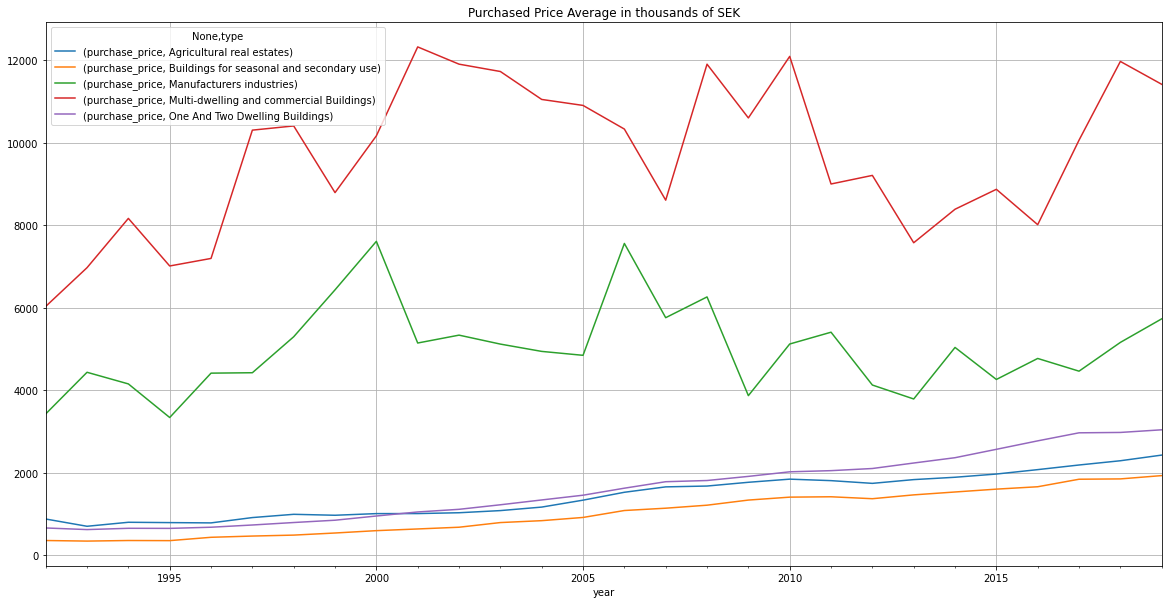

In [140]:
df[['purchase_price']].unstack().plot(figsize=(20,10), title='Purchased Price Average in thousands of SEK', grid=True)

<AxesSubplot:title={'center':'coef = purchase price/assessed value'}, xlabel='year'>

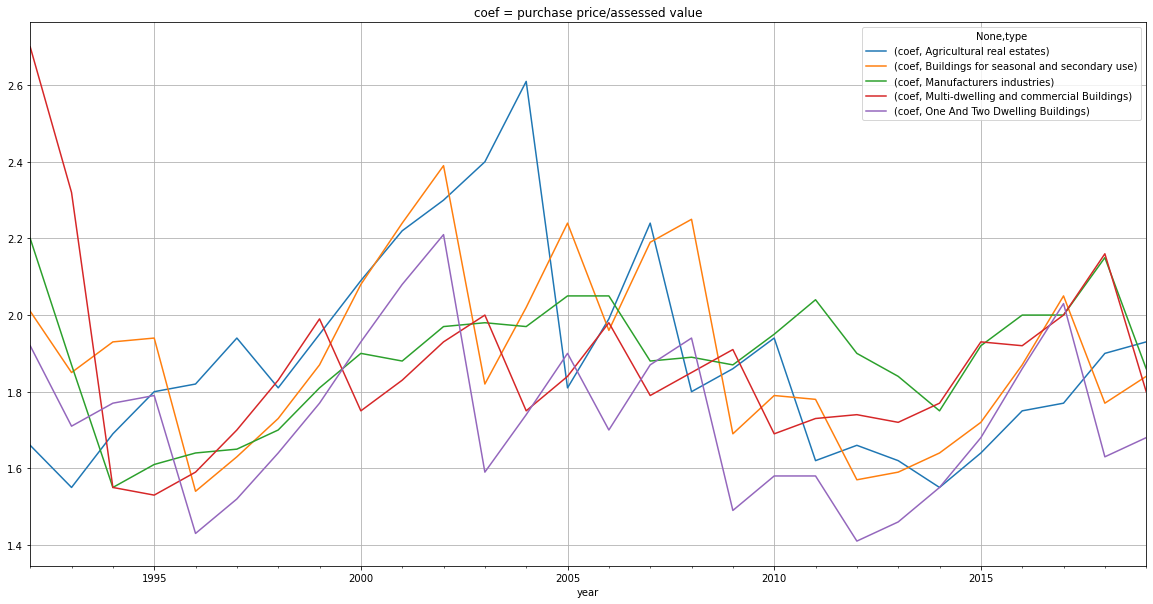

In [141]:
df[['coef']].unstack().plot(figsize=(20,10), title='coef = purchase price/assessed value', grid=True)

<AxesSubplot:title={'center':'Number of purchased real estate'}, xlabel='year'>

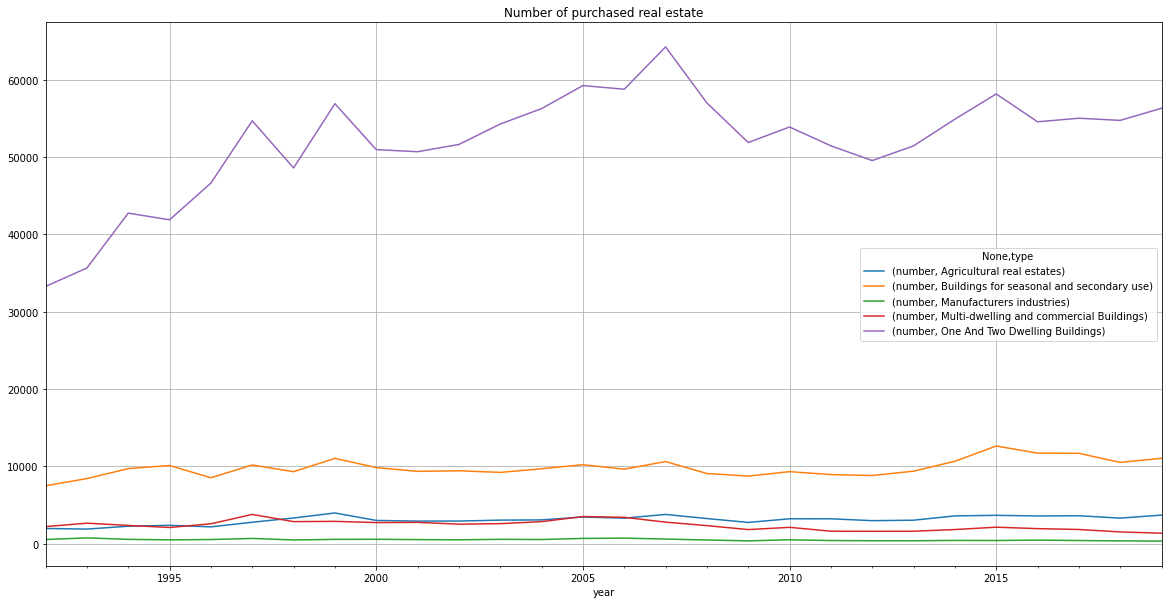

In [142]:
df[['number']].unstack().plot(figsize=(20,10), title='Number of purchased real estate', grid=True)

In [486]:
df[['number']].unstack().max()

        type                                    
number  Agricultural real estates                    3987
        Buildings for seasonal and secondary use    12640
        Manufacturers industries                      768
        Multi-dwelling and commercial Buildings      3801
        One And Two Dwelling Buildings              64221
dtype: int64

In [143]:
# Go on the details of commercial buildings
scb.go_up()
scb.go_down('FastprisHHRegionAr')

In [144]:
table_info = scb.info()
title = table_info['title']

In [145]:
REGION_MAP = dict(zip(table_info['variables'][0]['valueTexts'], table_info['variables'][0]['values']))

In [146]:
# In this case I have loaded from the data folder, so I downloaded from the website
# Sold multi-dwelling and commercial buildings by region, type of real estate, observations and year
sold_commercial_buildings = pd.read_csv('./data/BO0501B1_20200928-213250.csv', delimiter=',')

In [147]:
sold_commercial_buildings.columns

Index(['region', 'type of real estate', 'Number 1989', 'Number 1990',
       'Number 1991', 'Number 1992', 'Number 1993', 'Number 1994',
       'Number 1995', 'Number 1996',
       ...
       'Purchase-price-coefficient 2010', 'Purchase-price-coefficient 2011',
       'Purchase-price-coefficient 2012', 'Purchase-price-coefficient 2013',
       'Purchase-price-coefficient 2014', 'Purchase-price-coefficient 2015',
       'Purchase-price-coefficient 2016', 'Purchase-price-coefficient 2017',
       'Purchase-price-coefficient 2018', 'Purchase-price-coefficient 2019'],
      dtype='object', length=126)

In [148]:
number_commercial_buildings = sold_commercial_buildings.filter(regex='region|type of real estate|Number')

In [149]:
number_commercial_buildings.head()

,region,type of real estate,Number 1989,Number 1990,Number 1991,Number 1992,Number 1993,Number 1994,Number 1995,Number 1996,...,Number 2010,Number 2011,Number 2012,Number 2013,Number 2014,Number 2015,Number 2016,Number 2017,Number 2018,Number 2019
0,00 Sweden,multi-dwelling and commercial buildings (code ...,3007,2617,2728,2229,2670,2377,2114,2589,...,2131,1631,1621,1626,1848,2150,1964,1854,1538,1375
1,00 Sweden,multi-dwelling and commercial buildings with d...,1794,1511,1559,1215,1347,1350,1258,1525,...,1113,882,848,888,1052,1194,807,773,649,562
2,00 Sweden,multi-dwelling and commercial builings with bo...,720,644,674,579,695,607,525,653,...,484,315,329,332,339,441,710,679,536,499
3,00 Sweden,multi-dwelling and commercial buildings with n...,493,462,495,435,628,420,331,411,...,534,434,444,406,457,515,447,402,353,314
4,01 Stockholm county,multi-dwelling and commercial buildings (code ...,202,217,198,278,384,352,296,300,...,219,104,117,95,118,119,78,89,92,63


In [150]:
columns = number_commercial_buildings.columns

In [151]:
new_columns = []
for column in columns:
    names = column.split()
    if len(names) == 2:
        new_columns.append(names[1])
    else:
        new_columns.append(names[0])

In [152]:
number_commercial_buildings.columns = new_columns
number_commercial_buildings.head()

,region,type,1989,1990,1991,1992,1993,1994,1995,1996,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,00 Sweden,multi-dwelling and commercial buildings (code ...,3007,2617,2728,2229,2670,2377,2114,2589,...,2131,1631,1621,1626,1848,2150,1964,1854,1538,1375
1,00 Sweden,multi-dwelling and commercial buildings with d...,1794,1511,1559,1215,1347,1350,1258,1525,...,1113,882,848,888,1052,1194,807,773,649,562
2,00 Sweden,multi-dwelling and commercial builings with bo...,720,644,674,579,695,607,525,653,...,484,315,329,332,339,441,710,679,536,499
3,00 Sweden,multi-dwelling and commercial buildings with n...,493,462,495,435,628,420,331,411,...,534,434,444,406,457,515,447,402,353,314
4,01 Stockholm county,multi-dwelling and commercial buildings (code ...,202,217,198,278,384,352,296,300,...,219,104,117,95,118,119,78,89,92,63


In [153]:
number_commercial_buildings['type'].unique()

array(['multi-dwelling and commercial buildings (code 320, 321, 325)',
       'multi-dwelling and commercial buildings with dwellings (code 320)',
       'multi-dwelling and commercial builings with both dwellings and non-residential premises (code 321)',
       'multi-dwelling and commercial buildings with non-residential premises (code 325)'],
      dtype=object)

In [154]:
sum_per_region = number_commercial_buildings.loc[(number_commercial_buildings['type'] == 'multi-dwelling and commercial buildings (code 320, 321, 325)') & (number_commercial_buildings['region'] != '00 Sweden')].drop(columns=['type'])

In [155]:
sum_per_region = sum_per_region.set_index('region')

<AxesSubplot:>

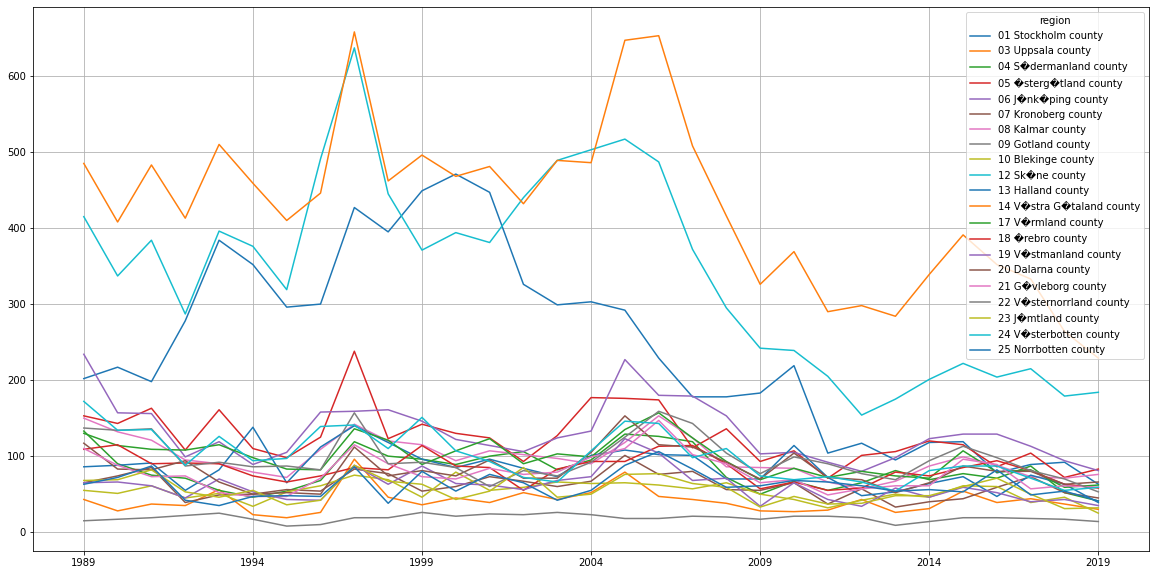

In [156]:
sum_per_region.transpose().astype(float).plot(figsize=(20,10), grid=True)

In [488]:
sum_per_region.transpose().astype(float).max()

region
01 Stockholm county          471.0
03 Uppsala county             96.0
04 S�dermanland county       133.0
05 �sterg�tland county       238.0
06 J�nk�ping county          234.0
07 Kronoberg county          101.0
08 Kalmar county             153.0
09 Gotland county             26.0
10 Blekinge county            79.0
12 Sk�ne county              637.0
13 Halland county            140.0
14 V�stra G�taland county    658.0
17 V�rmland county           157.0
18 �rebro county             115.0
19 V�stmanland county        123.0
20 Dalarna county            153.0
21 G�vleborg county          147.0
22 V�sternorrland county     159.0
23 J�mtland county            88.0
24 V�sterbotten county       172.0
25 Norrbotten county         106.0
dtype: float64

In [157]:
# Checking Hotel room ocuppancy
scb = SCB('en')

In [158]:
scb.go_down('NV')

In [159]:
scb.info()
#NV0802 might be interesting

[{'id': 'NV0103', 'type': 'l', 'text': 'Balance statistics'},
 {'id': 'NV0118',
  'type': 'l',
  'text': 'Non financial corporations: Foreign trade credits'},
 {'id': 'NV1701', 'type': 'l', 'text': 'Accommodation statistics'},
 {'id': 'NV0117', 'type': 'l', 'text': 'Non-profit organisations'},
 {'id': 'NV0602', 'type': 'l', 'text': 'Industrial inventories'},
 {'id': 'NV0004', 'type': 'l', 'text': 'Business Production Index'},
 {'id': 'NV0109', 'type': 'l', 'text': 'Structural business statistics'},
 {'id': 'NV0402', 'type': 'l', 'text': 'Industrial production index (IPI)'},
 {'id': 'NV0802', 'type': 'l', 'text': 'Enterprises´ IT expenditure'},
 {'id': 'NV0501', 'type': 'l', 'text': 'Orders and turnover in industry'},
 {'id': 'NV0116', 'type': 'l', 'text': 'ICT usage in enterprises'},
 {'id': 'NV0006', 'type': 'l', 'text': 'Production value index'},
 {'id': 'NV0101', 'type': 'l', 'text': 'Business Database'},
 {'id': 'NV0801', 'type': 'l', 'text': 'Investment Survey'},
 {'id': 'NV0701',

In [160]:
scb.go_down('NV1701')

In [161]:
scb.info()

[{'id': 'NV1701A', 'type': 'l', 'text': 'Year, definitive statistics'},
 {'id': 'NV1701B', 'type': 'l', 'text': 'Month, preliminary statistics'}]

In [162]:
scb.go_down('NV1701B')

In [163]:
scb.info()

[{'id': 'NV1701T3M',
  'type': 't',
  'text': 'Total capacity (including establishments that are closed)  by type of establishment for hotels, holiday villages and youth hostels. Preliminary statistics. Month 2008M01 - 2020M07',
  'updated': '2020-09-07T09:30:00'},
 {'id': 'NV1701T3BM',
  'type': 't',
  'text': 'Total capacity (including establishments that are closed)  by type of establishment camping. Preliminary statistics. Month 2008M01 - 2020M07',
  'updated': '2020-09-07T09:30:00'},
 {'id': 'NV1701T5BM',
  'type': 't',
  'text': 'Available beds, number of nights spent and occupancy rate in per cent, by region/county. All hotels, holiday villages and youth hostels. Preliminary statistics. Month 1978M01 - 2020M07',
  'updated': '2020-09-07T09:30:00'},
 {'id': 'NV1701T7M',
  'type': 't',
  'text': 'Number of available rooms and occupancy rate, revenue per occupied room for hotels, by region/county. Preliminary statistics. Month 2008M01 - 2020M07',
  'updated': '2020-09-07T09:30:00'}

In [164]:
scb.go_down('NV1701T7M')

In [165]:
capacity_info = scb.info()
capacity_title = capacity_info['title']
REGION_MAP = dict(zip(capacity_info['variables'][0]['values'], capacity_info['variables'][0]['valueTexts']))

In [166]:
num_available_rooms = scb.get_data()

In [181]:
#Source: http://api.scb.se/OV0104/v1/doris/en/ssd/NV/NV1701/NV1701B/NV1701T7M
data = []
for row in num_available_rooms['data']:
    mapped_time = row['key'][1].split('M')
    row_mapped = {
        'region': REGION_MAP[row['key'][0]],
        'date': datetime(year=int(mapped_time[0]), month=int(mapped_time[1]), day=1),
        'number_available_rooms': int(row['values'][0]), 
        'occupancy_rate': float(row['values'][1]), 
        'acc_revenue': int(row['values'][2])}
    data.append(row_mapped)

In [187]:
available_rooms_df = pd.DataFrame(data=data)
available_rooms = available_rooms_df.set_index(['date', 'region'])
available_rooms = available_rooms.sort_index()
available_rooms.head()

number_available_rooms  occupancy_rate  \
date       region                                                       
2008-01-01 Blekinge county                      45692            31.5   
           Dalarna county                      121315            37.8   
           Gotland county                       20005            19.2   
           Greater Gothenburg                  263428            54.2   
           Greater Malmö                       151444            46.6   

                               acc_revenue  
date       region                           
2008-01-01 Blekinge county             707  
           Dalarna county              778  
           Gotland county              796  
           Greater Gothenburg          875  
           Greater Malmö               881

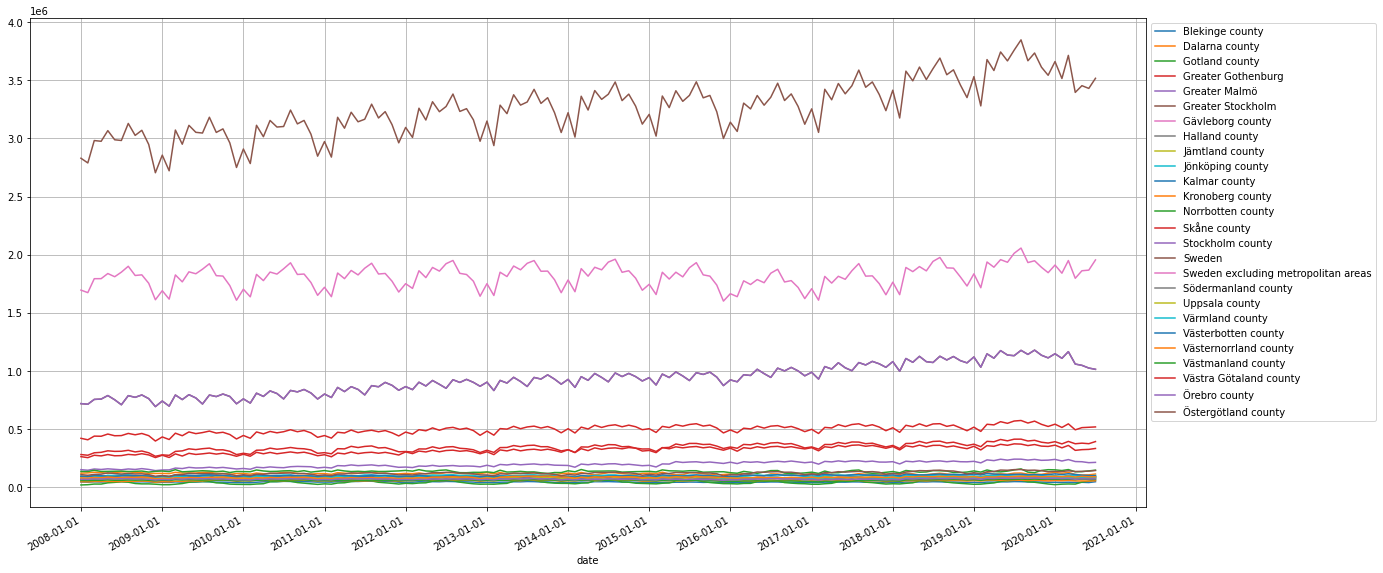

In [200]:
import matplotlib.pylab as plt
import matplotlib.dates as mdates
ax = available_rooms['number_available_rooms'].unstack().plot(figsize=(20,10), x_compat=True, grid=True)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

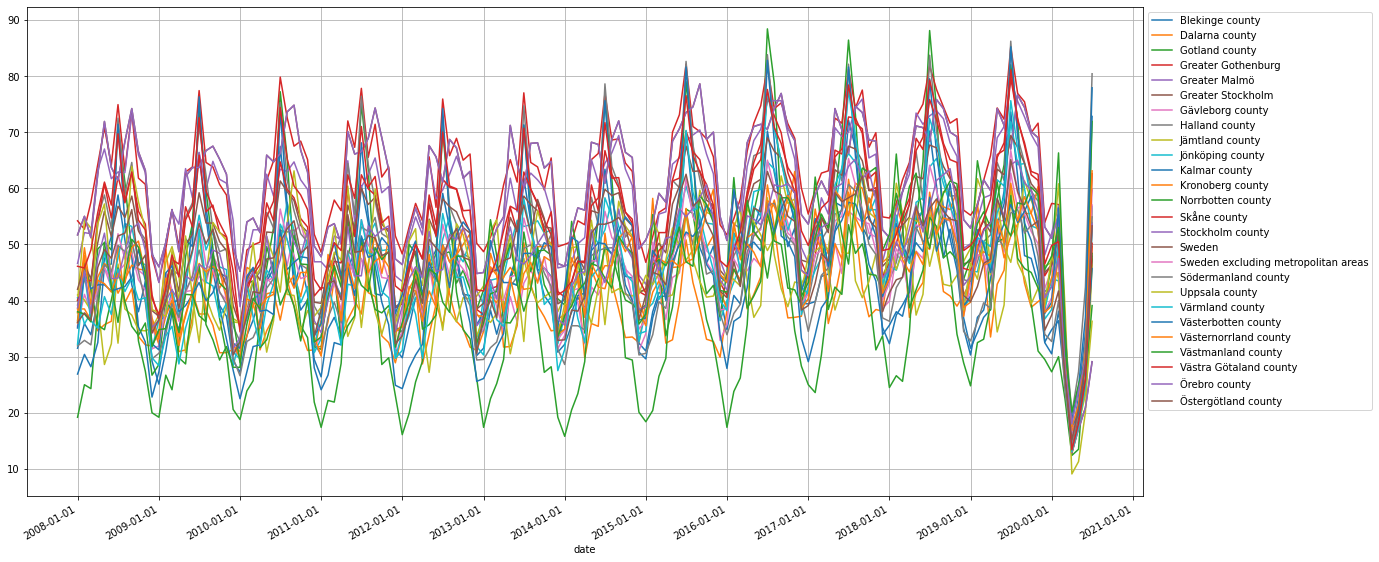

In [198]:
ax = available_rooms['occupancy_rate'].unstack().plot(figsize=(20,10), x_compat=True, grid=True)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

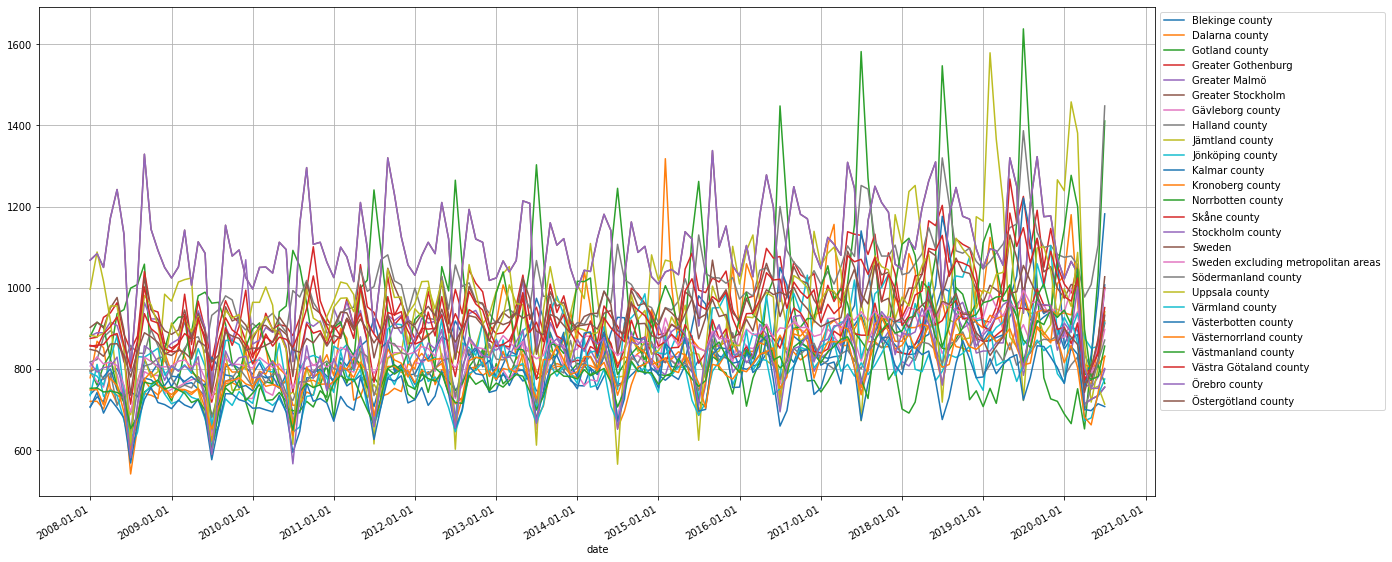

In [199]:
ax = available_rooms['acc_revenue'].unstack().plot(figsize=(20,10), x_compat=True, grid=True)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

In [247]:
# Checking Hotel room ocuppancy
scb = SCB('en')
scb.info()

[{'id': 'AM', 'type': 'l', 'text': 'Labour market'},
 {'id': 'BE', 'type': 'l', 'text': 'Population'},
 {'id': 'BO', 'type': 'l', 'text': 'Housing, construction and building'},
 {'id': 'EN', 'type': 'l', 'text': 'Energy'},
 {'id': 'FM', 'type': 'l', 'text': 'Financial markets'},
 {'id': 'HA', 'type': 'l', 'text': 'Trade in goods and services'},
 {'id': 'HE', 'type': 'l', 'text': 'Household finances'},
 {'id': 'JO', 'type': 'l', 'text': 'Agriculture, forestry and fishery'},
 {'id': 'LE', 'type': 'l', 'text': 'Living conditions'},
 {'id': 'ME', 'type': 'l', 'text': 'Democracy'},
 {'id': 'MI', 'type': 'l', 'text': 'Environment'},
 {'id': 'NR', 'type': 'l', 'text': 'National accounts'},
 {'id': 'NV', 'type': 'l', 'text': 'Business activities'},
 {'id': 'OE', 'type': 'l', 'text': 'Public finances'},
 {'id': 'PR', 'type': 'l', 'text': 'Prices and Consumption'},
 {'id': 'TK', 'type': 'l', 'text': 'Transport and communications'},
 {'id': 'UF', 'type': 'l', 'text': 'Education and research'}]

In [248]:
scb.go_down('BE')

In [249]:
scb.info()

[{'id': 'BE0701', 'type': 'l', 'text': 'Demographic Analysis (Demography)'},
 {'id': 'BE0001', 'type': 'l', 'text': 'Name statistics'},
 {'id': 'BE0401', 'type': 'l', 'text': 'Population projections'},
 {'id': 'BE0101', 'type': 'l', 'text': 'Population statistics'}]

In [250]:
scb.go_down('BE0101')
scb.info()

[{'id': 'BE0101A', 'type': 'l', 'text': 'Number of inhabitants'},
 {'id': 'BE0101B', 'type': 'l', 'text': 'Average age'},
 {'id': 'BE0101C', 'type': 'l', 'text': 'Population density'},
 {'id': 'BE0101D', 'type': 'l', 'text': 'Mean population'},
 {'id': 'BE0101E', 'type': 'l', 'text': 'Foreign-born persons'},
 {'id': 'BE0101F', 'type': 'l', 'text': 'Foreign citizens'},
 {'id': 'BE0101G', 'type': 'l', 'text': 'Summary of vital events'},
 {'id': 'BE0101H', 'type': 'l', 'text': 'Live births'},
 {'id': 'BE0101I', 'type': 'l', 'text': 'Deaths'},
 {'id': 'BE0101J', 'type': 'l', 'text': 'Migration - internal and external'},
 {'id': 'BE0101S', 'type': 'l', 'text': 'Household'},
 {'id': 'BE0101L', 'type': 'l', 'text': 'Married, divorced and widowed'},
 {'id': 'BE0101N', 'type': 'l', 'text': 'Changes of citizenship'},
 {'id': 'BE0101O', 'type': 'l', 'text': 'Registered partnership'},
 {'id': 'BE0101P', 'type': 'l', 'text': 'Asylum-seekers'},
 {'id': 'BE0101Q', 'type': 'l', 'text': 'Foreign/Swedis

In [251]:
scb.go_down('BE0101J')
scb.info()

[{'id': 'ImmiBosattMedb',
  'type': 't',
  'text': 'Immigrations (except citizens from Nordic countries) by grounds for settlement, country of citizenship and sex. Year 2004 - 2019',
  'updated': '2020-03-19T09:30:00'},
 {'id': 'ImmiBosatt',
  'type': 't',
  'text': 'Immigrations (except citizens from Nordic countries) by grounds for settlement, birth and sex. Year 2001 - 2010',
  'updated': '2011-05-23T09:30:00'},
 {'id': 'Flyttningar',
  'type': 't',
  'text': 'Migration by region, age and sex. Year 1968-1996 1968 - 1996',
  'updated': '1997-02-05T11:04:00'},
 {'id': 'Flyttningar97',
  'type': 't',
  'text': 'Migration by region, age and sex. Year 1997 - 2019',
  'updated': '2020-02-20T09:30:00'},
 {'id': 'ImmiEmiFod',
  'type': 't',
  'text': 'Immigrations and emigrations by country of birth and sex. Year 2000 - 2019',
  'updated': '2020-02-20T09:30:00'},
 {'id': 'ImmiEmiMedb',
  'type': 't',
  'text': 'Immigrations and emigrations by country of citizenship and sex. Year 2000 - 2019

In [252]:
scb.go_down('InOmflytt')
internal_movement_info = scb.info()
COUNTRIES_TO = dict(zip(internal_movement_info['variables'][0]['values'], internal_movement_info['variables'][0]['valueTexts']))
COUNTRIES_FROM = dict(zip(internal_movement_info['variables'][1]['values'], internal_movement_info['variables'][1]['valueTexts']))

In [258]:
internal_movement_info

{'title': 'Internal migration between counties by Counties, to , Counties, from , sex, observations and year',
 'variables': [{'code': 'InflyttningsL',
   'text': 'Counties, to ',
   'values': ['01',
    '03',
    '04',
    '05',
    '06',
    '07',
    '08',
    '09',
    '10',
    '12',
    '13',
    '14',
    '17',
    '18',
    '19',
    '20',
    '21',
    '22',
    '23',
    '24',
    '25'],
   'valueTexts': ['Stockholm county (Counties, to)',
    'Uppsala county (Counties, to)',
    'Södermanland county (Counties, to)',
    'Östergötland county (Counties, to)',
    'Jönköping county (Counties, to)',
    'Kronoberg county (Counties, to)',
    'Kalmar county (Counties, to)',
    'Gotland county (Counties, to)',
    'Blekinge county (Counties, to)',
    'Skåne county (Counties, to)',
    'Halland county (Counties, to)',
    'Västra Götaland county (Counties, to)',
    'Värmland county (Counties, to)',
    'Örebro county (Counties, to)',
    'Västmanland county (Counties, to)',
    

In [255]:
scb.get_url()

'http://www.statistikdatabasen.scb.se/pxweb/en/ssd/START__BE__BE0101__BE0101J/InOmflytt'

In [256]:
internal_movement_data = scb.get_data()

In [452]:
#Source: 'http://www.statistikdatabasen.scb.se/pxweb/en/ssd/START__BE__BE0101__BE0101J/InOmflytt'
data = []
for row in internal_movement_data['data']:
    row_mapped = {
        'from': row['key'][0],
        'to': row['key'][1],
        'year': datetime(year=int(row['key'][2]), month=1, day=1),
        'value': float(row['values'][0])
    }
    data.append(row_mapped)

In [453]:
internal_move_df = pd.DataFrame(data=data)
internal_move_df.head()

,from,to,year,value
0,01,01,2000-01-01,0.0
1,01,01,2001-01-01,0.0
2,01,01,2002-01-01,0.0
3,01,01,2003-01-01,0.0
4,01,01,2004-01-01,0.0


In [454]:
from_stockholm = internal_move_df.loc[internal_move_df['from'] == '01']
to_stockholm = internal_move_df.loc[internal_move_df['to'] == '01']

In [455]:
from_stockholm.columns

Index(['from', 'to', 'year', 'value'], dtype='object')

In [456]:
from_stockholm = from_stockholm.drop(columns=['from'])
to_stockholm = to_stockholm.drop(columns=['to'])

In [457]:
from_stockholm['to_name'] = from_stockholm['to'].map(COUNTRIES_TO)
to_stockholm['from_name'] = to_stockholm['from'].map(COUNTRIES_FROM)

In [458]:
from_stockholm.head()

,to,year,value,to_name
0,01,2000-01-01,0.0,"Stockholm county (Counties, to)"
1,01,2001-01-01,0.0,"Stockholm county (Counties, to)"
2,01,2002-01-01,0.0,"Stockholm county (Counties, to)"
3,01,2003-01-01,0.0,"Stockholm county (Counties, to)"
4,01,2004-01-01,0.0,"Stockholm county (Counties, to)"


In [459]:
to_stockholm.head()

,from,year,value,from_name
0,01,2000-01-01,0.0,"Stockholm county (Counties, from )"
1,01,2001-01-01,0.0,"Stockholm county (Counties, from )"
2,01,2002-01-01,0.0,"Stockholm county (Counties, from )"
3,01,2003-01-01,0.0,"Stockholm county (Counties, from )"
4,01,2004-01-01,0.0,"Stockholm county (Counties, from )"


In [460]:
from_stockholm = from_stockholm.set_index(['year', 'to_name'])
to_stockholm = to_stockholm.set_index(['year', 'from_name'])

In [476]:
from_sum = from_stockholm.groupby('year').sum()

In [477]:
to_sum = to_stockholm.groupby('year').sum()

In [483]:
sum_year = to_sum.join(from_sum, on='year', rsuffix='_from', lsuffix='_to')

<AxesSubplot:xlabel='year'>

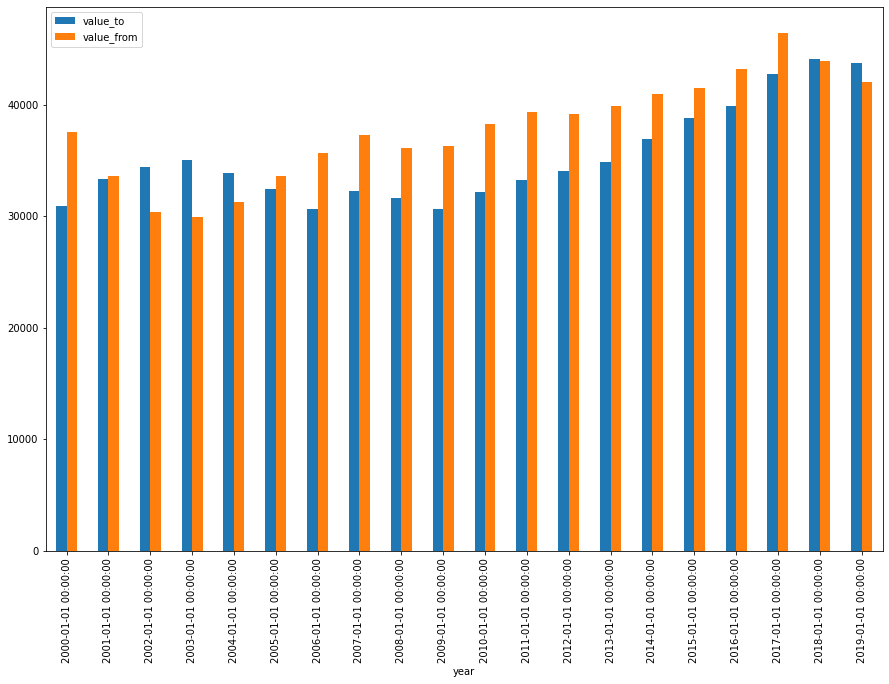

In [485]:
sum_year.plot.bar(figsize=(15,10))

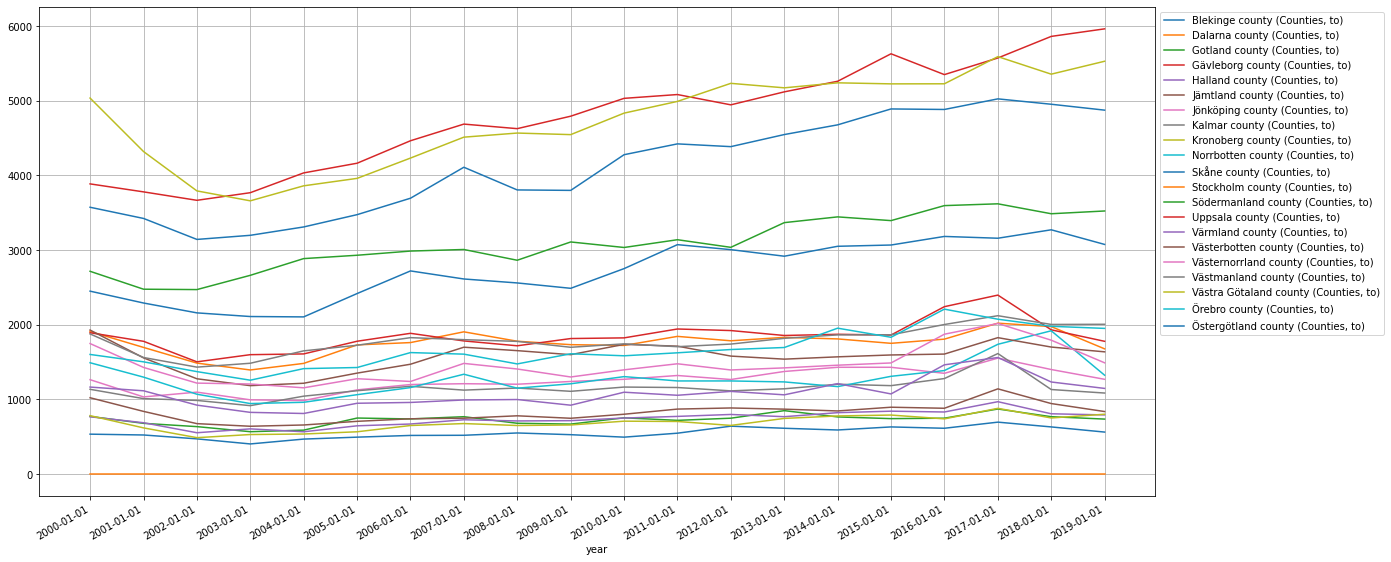

In [461]:
ax = from_stockholm['value'].unstack().plot(figsize=(20,10), x_compat=True, grid=True)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

In [492]:
from_stockholm['value'].unstack().max().sort_values()

to_name
Stockholm county (Counties, to)             0.0
Blekinge county (Counties, to)            694.0
Gotland county (Counties, to)             870.0
Kronoberg county (Counties, to)           879.0
Halland county (Counties, to)             968.0
Jämtland county (Counties, to)           1140.0
Jönköping county (Counties, to)          1552.0
Värmland county (Counties, to)           1560.0
Kalmar county (Counties, to)             1613.0
Norrbotten county (Counties, to)         1918.0
Västerbotten county (Counties, to)       1928.0
Västernorrland county (Counties, to)     2016.0
Dalarna county (Counties, to)            2020.0
Västmanland county (Counties, to)        2120.0
Örebro county (Counties, to)             2208.0
Gävleborg county (Counties, to)          2396.0
Östergötland county (Counties, to)       3271.0
Södermanland county (Counties, to)       3619.0
Skåne county (Counties, to)              5025.0
Västra Götaland county (Counties, to)    5591.0
Uppsala county (Counties, to)   

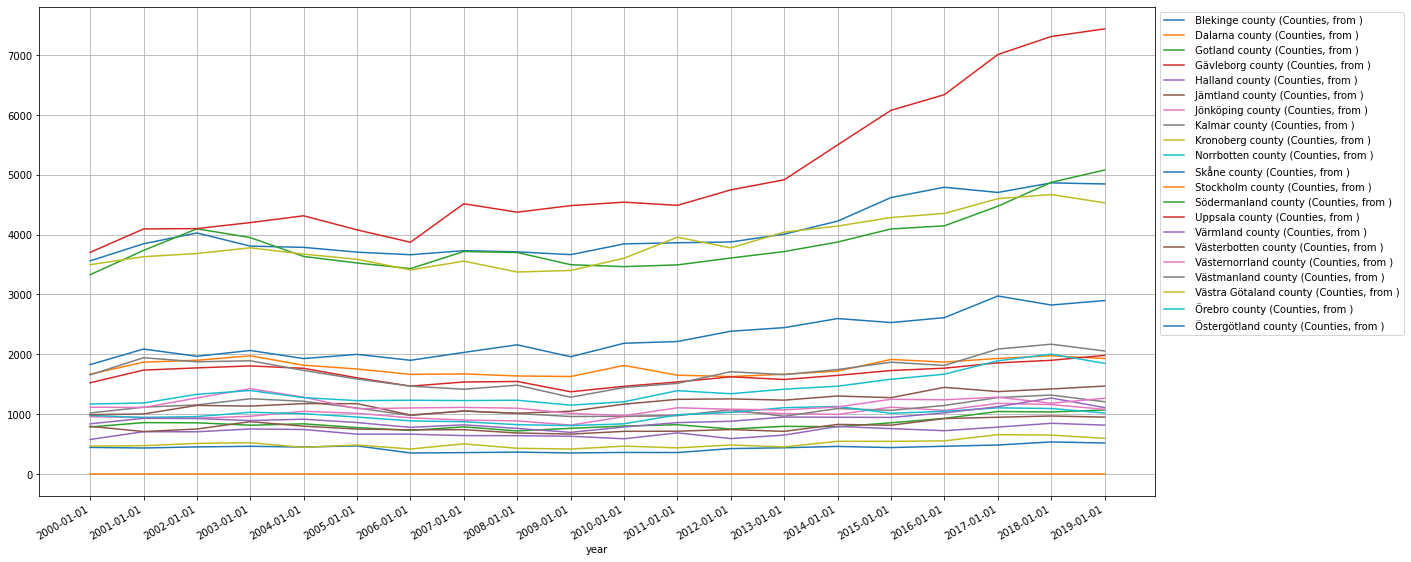

In [462]:
ax = to_stockholm['value'].unstack().plot(figsize=(20,10), x_compat=True, grid=True)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

In [494]:
to_stockholm['value'].unstack().max().sort_values()

from_name
 Stockholm county (Counties, from )             0.0
 Blekinge county (Counties, from )            535.0
 Kronoberg county (Counties, from )           657.0
 Halland county (Counties, from )             847.0
 Jämtland county (Counties, from )            969.0
 Gotland county (Counties, from )            1069.0
 Norrbotten county (Counties, from )         1128.0
 Jönköping county (Counties, from )          1181.0
 Värmland county (Counties, from )           1269.0
 Kalmar county (Counties, from )             1319.0
 Västernorrland county (Counties, from )     1426.0
 Västerbotten county (Counties, from )       1469.0
 Dalarna county (Counties, from )            1976.0
 Gävleborg county (Counties, from )          1982.0
 Örebro county (Counties, from )             2003.0
 Västmanland county (Counties, from )        2169.0
 Östergötland county (Counties, from )       2975.0
 Västra Götaland county (Counties, from )    4671.0
 Skåne county (Counties, from )              4866.0
 S

In [438]:
from_stockholm = from_stockholm.reset_index()
to_stockholm = to_stockholm.reset_index()

In [440]:
from_stockholm.rename(columns={'to': 'key'}, inplace=True)
to_stockholm.rename(columns={'from': 'key'}, inplace=True)

In [449]:
from_stockholm['key'] = str(from_stockholm['key'])

In [450]:
from_stockholm.dtypes

year       datetime64[ns]
to_name            object
key                object
value             float64
dtype: object

In [451]:
from_stockholm.head()

,year,to_name,key,value
0,2000-01-01,"Stockholm county (Counties, to)",0 b'01'\n1 b'01'\n2 b'01'\n3 ...,0.0
1,2001-01-01,"Stockholm county (Counties, to)",0 b'01'\n1 b'01'\n2 b'01'\n3 ...,0.0
2,2002-01-01,"Stockholm county (Counties, to)",0 b'01'\n1 b'01'\n2 b'01'\n3 ...,0.0
3,2003-01-01,"Stockholm county (Counties, to)",0 b'01'\n1 b'01'\n2 b'01'\n3 ...,0.0
4,2004-01-01,"Stockholm county (Counties, to)",0 b'01'\n1 b'01'\n2 b'01'\n3 ...,0.0
